# 1.概率
机器学习就是做出预测
## 1.1 基本概率论
假设我们掷骰子，如果骰子公平，那么所有结果都是相同概率的。对于每个值，一种自然的方法是将他们出现的次数除以投掷的总次数，即**此事件的估计指**。**大数定律**告诉我们：随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。

In [1]:
%matplotlib inline # 让Matplotlib的图表直接显示在代码单元格下方，而不是弹出新窗口
import torch
from torch.distributions import multinomial # 从PyTorch的分布模块导入多项分布
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为**抽样**。可以把分布看作对事件的概率分配。而将概率分配给一些离散选择的分布称为**多项分布**。</br>
为了抽取一个样本，即掷骰子，我们只需要输入一个概率向量。输出是另一个相同长度的向量；他在索引i处的值是采样结果中i出现的次数。

In [6]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample() # fair_probs 是概率分布向量; 1表示总抽样次数（投掷骰子的次数）

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 0., 1., 0.])

In [7]:
# 从同一分布中生成多个样本
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 2., 3., 1., 1.])

In [9]:
# 投掷1000次
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1960, 0.1600, 0.1580, 0.1640, 0.1470, 0.1750])

因为我们模拟的是一个公平骰子投掷的数据，我们知道每个结果都有真实的概率$\frac{1}{6}$，约为0.167，所以上面输出的估计值差不多。</br>
接下来我们进行500组实验，每组抽取是个样本。

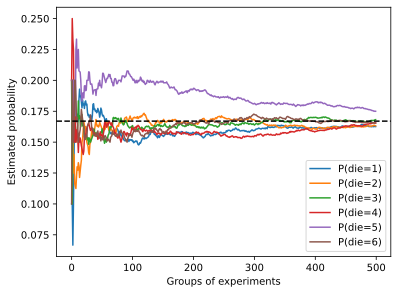

In [12]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) # 进行500组实验，每组实验投掷骰子10次
cum_counts = counts.cumsum(dim=0) # 沿第0维（实验组数维度）进行累积求和
estimates = cum_counts / cum_counts.sum(dim = 1, keepdims = True) # 计算经验概率; keepdims=True：保持维度，便于广播运算

d2l.set_figsize((6, 4.5)) # 设置图形大小为6×4.5英寸
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")")) # 绘制6条曲线，每条对应一个骰子面的概率估计值
d2l.plt.axhline(y = 0.167, color = 'black', linestyle='dashed') # 添加水平参考线
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

## 1.2 期望和方差
为了概括概率分布的关键特征，我们需要一些测量方法。一个随机变量X的期望或平均值表示为：
$$
E[X] = \sum_{x}xP(X = x)
$$
当函数f(x)的输入是从分布P中抽取的随机变量时，f(x)的期望为：
$$
E^{x~p}[f(x)] = sum_{x}f(x)P(x)
$$
在许多情况下，我们需要衡量随机变量X与其期望的偏差。这可以通过方差来量化：
$$
Var[X]=E[(X-E[X])^2] = E[X^2] - E[X]^2
$$
方差的平方根被称为标准差。随机变量函数的方差衡量的是，当从该随机变量分布中抽取不同值x时，函数值偏离该函数的期望的程度：
$$
Var[f(x)] = E[(f(x)-E[f(x)])^2]
$$
